# This is the Covid_project using dataset from Kaggle.

In this project, I will check:

    - Death rate based on Age/sex
    - Common symptoms/symptoms rate
    - Allegry vs adverse effect

Dataset is from Kaggle: https://www.kaggle.com/ayushggarg/covid19-vaccine-adverse-reactions

# TABLE OF CONTENTS

&emsp;I.   [Import and have a look at Dataset](#1)
   
&emsp;II.  [Cleanning data](#2)
   
&emsp;III. [Analysing fatality rate after covid vaccination by age and sex](#3)
   
&emsp;&emsp;[A. Analysing fatality rate after covid vaccination by Sex](#3.1)

&emsp;&emsp;[B. Analysing fatality rate after covid vaccination by Age](#3.2)


# I. Import and have a look at Dataset: <a name = "1"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_data = pd.read_csv("./dataset/2021VAERSDATA.csv",low_memory=False)
df_symptoms = pd.read_csv("./dataset/2021VAERSSYMPTOMS.csv", low_memory=False)
df_vaccine = pd.read_csv("./dataset/2021VAERSVAX.csv", low_memory=False)

In [3]:
print(df_data.shape)
print(df_symptoms.shape)
print(df_vaccine.shape)

(34121, 35)
(48110, 11)
(34630, 8)


In [4]:
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      34121 non-null  int64  
 1   RECVDATE      34121 non-null  object 
 2   STATE         28550 non-null  object 
 3   AGE_YRS       30933 non-null  float64
 4   CAGE_YR       26791 non-null  float64
 5   CAGE_MO       83 non-null     float64
 6   SEX           34121 non-null  object 
 7   RPT_DATE      63 non-null     object 
 8   SYMPTOM_TEXT  34119 non-null  object 
 9   DIED          1957 non-null   object 
 10  DATEDIED      1798 non-null   object 
 11  L_THREAT      1259 non-null   object 
 12  ER_VISIT      11 non-null     object 
 13  HOSPITAL      4387 non-null   object 
 14  HOSPDAYS      2857 non-null   float64
 15  X_STAY        52 non-null     object 
 16  DISABLE       870 non-null    object 
 17  RECOVD        31264 non-null  object 
 18  VAX_DATE      32622 non-nu

In [5]:
print(df_data.head())

   VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
0    916600  01/01/2021    TX     33.0     33.0      NaN   F      NaN   
1    916601  01/01/2021    CA     73.0     73.0      NaN   F      NaN   
2    916602  01/01/2021    WA     23.0     23.0      NaN   F      NaN   
3    916603  01/01/2021    WA     58.0     58.0      NaN   F      NaN   
4    916604  01/01/2021    TX     47.0     47.0      NaN   F      NaN   

                                        SYMPTOM_TEXT DIED  ...  \
0  Right side of epiglottis swelled up and hinder...  NaN  ...   
1  Approximately 30 min post vaccination administ...  NaN  ...   
2  About 15 minutes after receiving the vaccine, ...  NaN  ...   
3  extreme fatigue, dizziness,. could not lift my...  NaN  ...   
4  Injection site swelling, redness, warm to the ...  NaN  ...   

                                             CUR_ILL  \
0                                               None   
1  Patient residing at nursing facility. See pati...

# II. Cleanning data <a name = "2"></a>

In [6]:
df_data.isna().sum() 

VAERS_ID            0
RECVDATE            0
STATE            5571
AGE_YRS          3188
CAGE_YR          7330
CAGE_MO         34038
SEX                 0
RPT_DATE        34058
SYMPTOM_TEXT        2
DIED            32164
DATEDIED        32323
L_THREAT        32862
ER_VISIT        34110
HOSPITAL        29734
HOSPDAYS        31264
X_STAY          34069
DISABLE         33251
RECOVD           2857
VAX_DATE         1499
ONSET_DATE       1863
NUMDAYS          2927
LAB_DATA        19041
V_ADMINBY           0
V_FUNDBY        34057
OTHER_MEDS      13882
CUR_ILL         18052
HISTORY         11746
PRIOR_VAX       32687
SPLTTYPE        25898
FORM_VERS           0
TODAYS_DATE       199
BIRTH_DEFECT    34070
OFC_VISIT       28717
ER_ED_VISIT     28592
ALLERGIES       15534
dtype: int64

As you can see, DIED column have NaN value. We will use fillna function to solve the problem.

In [7]:
Died_sorted = df_data["DIED"].fillna("N")
print(Died_sorted)

0        N
1        N
2        N
3        N
4        N
        ..
34116    N
34117    N
34118    Y
34119    Y
34120    Y
Name: DIED, Length: 34121, dtype: object


In [8]:
df_data["DIED_SORTED"] = df_data["DIED"].fillna("N")
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      34121 non-null  int64  
 1   RECVDATE      34121 non-null  object 
 2   STATE         28550 non-null  object 
 3   AGE_YRS       30933 non-null  float64
 4   CAGE_YR       26791 non-null  float64
 5   CAGE_MO       83 non-null     float64
 6   SEX           34121 non-null  object 
 7   RPT_DATE      63 non-null     object 
 8   SYMPTOM_TEXT  34119 non-null  object 
 9   DIED          1957 non-null   object 
 10  DATEDIED      1798 non-null   object 
 11  L_THREAT      1259 non-null   object 
 12  ER_VISIT      11 non-null     object 
 13  HOSPITAL      4387 non-null   object 
 14  HOSPDAYS      2857 non-null   float64
 15  X_STAY        52 non-null     object 
 16  DISABLE       870 non-null    object 
 17  RECOVD        31264 non-null  object 
 18  VAX_DATE      32622 non-nu

Since df_data has data from many kind of vaccines. We need only covid vaccine, so we will merge df_data and df_vaccine.

In [9]:
df_data_vaccine= df_data.merge(df_vaccine, how = "inner", on = "VAERS_ID")
print(df_data_vaccine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34630 entries, 0 to 34629
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         34630 non-null  int64  
 1   RECVDATE         34630 non-null  object 
 2   STATE            29009 non-null  object 
 3   AGE_YRS          31421 non-null  float64
 4   CAGE_YR          27252 non-null  float64
 5   CAGE_MO          105 non-null    float64
 6   SEX              34630 non-null  object 
 7   RPT_DATE         65 non-null     object 
 8   SYMPTOM_TEXT     34628 non-null  object 
 9   DIED             2042 non-null   object 
 10  DATEDIED         1873 non-null   object 
 11  L_THREAT         1314 non-null   object 
 12  ER_VISIT         11 non-null     object 
 13  HOSPITAL         4555 non-null   object 
 14  HOSPDAYS         2969 non-null   float64
 15  X_STAY           54 non-null     object 
 16  DISABLE          912 non-null    object 
 17  RECOVD      

Then we need to sort VAX_NAME column giving only covid vaccine, and add new column named "VAX_DATE_CHANGED_TYPE" that changed
datatatype from object to datetime.

In [10]:
df_data_vaccine_sorted = df_data_vaccine[df_data_vaccine["VAX_TYPE"] == "COVID19"]
df_data_vaccine_sorted["VAX_DATE_CHANGED_TYPE"] = pd.to_datetime(df_data_vaccine_sorted["VAX_DATE"])
print(df_data_vaccine_sorted.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34174 entries, 0 to 34629
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VAERS_ID               34174 non-null  int64         
 1   RECVDATE               34174 non-null  object        
 2   STATE                  28646 non-null  object        
 3   AGE_YRS                31138 non-null  float64       
 4   CAGE_YR                27023 non-null  float64       
 5   CAGE_MO                69 non-null     float64       
 6   SEX                    34174 non-null  object        
 7   RPT_DATE               65 non-null     object        
 8   SYMPTOM_TEXT           34172 non-null  object        
 9   DIED                   1969 non-null   object        
 10  DATEDIED               1816 non-null   object        
 11  L_THREAT               1295 non-null   object        
 12  ER_VISIT               11 non-null     object        
 13  H

<ipython-input-10-1f8428408c77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_vaccine_sorted["VAX_DATE_CHANGED_TYPE"] = pd.to_datetime(df_data_vaccine_sorted["VAX_DATE"])


In the VAX_DATE_CHANGED_TYPE column, we have some date from 1920 to 2018. During that time, we did not have vaccine to inject.
Therefore we need to remove the values from VAX_DATE_CHANGED_TYPE column. We will assume that people will be vaccinated from 2020.

In [11]:
df_data = df_data_vaccine_sorted
df_data["VAX_DATE_CHANGED_DATE"] = df_data["VAX_DATE_CHANGED_TYPE"][df_data["VAX_DATE_CHANGED_TYPE"] > '2019-12-31']
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34174 entries, 0 to 34629
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VAERS_ID               34174 non-null  int64         
 1   RECVDATE               34174 non-null  object        
 2   STATE                  28646 non-null  object        
 3   AGE_YRS                31138 non-null  float64       
 4   CAGE_YR                27023 non-null  float64       
 5   CAGE_MO                69 non-null     float64       
 6   SEX                    34174 non-null  object        
 7   RPT_DATE               65 non-null     object        
 8   SYMPTOM_TEXT           34172 non-null  object        
 9   DIED                   1969 non-null   object        
 10  DATEDIED               1816 non-null   object        
 11  L_THREAT               1295 non-null   object        
 12  ER_VISIT               11 non-null     object        
 13  H

<ipython-input-11-b8943dfc00ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["VAX_DATE_CHANGED_DATE"] = df_data["VAX_DATE_CHANGED_TYPE"][df_data["VAX_DATE_CHANGED_TYPE"] > '2019-12-31']


Now we have new df_data_vaccine_sorted that having sorted vaccine_type column and vax_date_changed_type column. Let's use it
to analyse the fatality rate after covid vaccination by age and sex.

# III. Analysing fatality rate after covid vaccination by age and sex<a name = "3"></a>

***A. Analysing fatality rate after covid vaccination by Sex***<a name = "3.1"></a>

Fist, we will look at the fatality rate after covid vaccination 

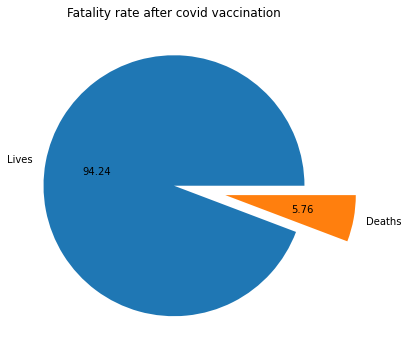

In [12]:
df_deaths_lives_rate = df_data["DIED_SORTED"].value_counts(normalize = True)
plt.figure(figsize = (6,6))
plt.title("Fatality rate after covid vaccination")
plt.pie(df_deaths_lives_rate, autopct = "%.2f", labels = ["Lives", "Deaths"], explode = [0,0.4])
plt.show()

From the chart, the rate of death after vaccination is around 5.7%. 

Next, we will analyse the fatality rate after vaccination by age and sex. First, we will subset columns AGE_YRS, SEX, DIED from df_data

In [13]:
df_age_sex_die = df_data[["AGE_YRS", "SEX", "DIED"]]
print(df_age_sex_die)

       AGE_YRS SEX DIED
0         33.0   F  NaN
1         73.0   F  NaN
2         23.0   F  NaN
3         58.0   F  NaN
4         47.0   F  NaN
...        ...  ..  ...
34625     88.0   F  NaN
34626     83.0   F  NaN
34627     59.0   F    Y
34628     57.0   M    Y
34629      NaN   F    Y

[34174 rows x 3 columns]


Then, we will sort DIED column by "Y"

In [14]:
df_sorted_died = df_age_sex_die[df_age_sex_die["DIED"] == "Y"]
print(df_sorted_died)

       AGE_YRS SEX DIED
474       82.0   M    Y
1131      90.0   F    Y
1134      78.0   F    Y
1385      64.0   M    Y
1605      65.0   F    Y
...        ...  ..  ...
34621      NaN   U    Y
34622     70.0   M    Y
34627     59.0   F    Y
34628     57.0   M    Y
34629      NaN   F    Y

[1969 rows x 3 columns]


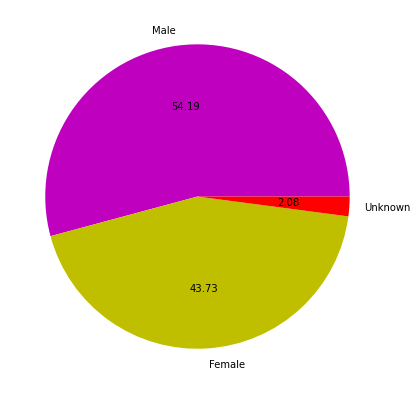

In [15]:
df_death_by_sex = df_sorted_died["SEX"].value_counts(normalize = True)
df_death_by_sex_labels = ["Male","Female","Unknown"]
df_death_by_sex_colors = ["m","y","r"]
plt.figure(figsize = (7,7))
plt.pie(df_sorted_died["SEX"].value_counts(normalize = True), autopct = "%.2f",labels = df_death_by_sex_labels, colors = df_death_by_sex_colors)
plt.show()

We can see that in the fatality rate 5.76% after vaccination, the fatality rate of female, male and unknown is 43.73%, 54,19%, 2.08% respectively.

***B. Analysing fatality rate after covid vaccination by Age***<a name = "3.2"></a>

In [18]:
df_death_by_age = df_sorted_died["AGE_YRS"].value_counts()
print(df_death_by_age)


85.0     71
77.0     70
83.0     69
90.0     64
88.0     62
         ..
33.0      1
104.0     1
24.0      1
30.0      1
22.0      1
Name: AGE_YRS, Length: 83, dtype: int64


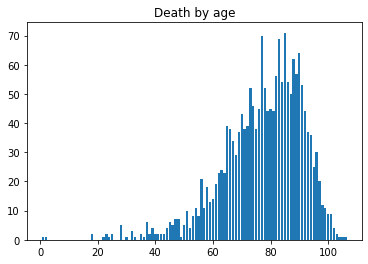

In [21]:
plt.bar(df_death_by_age.index,df_death_by_age.values)
plt.title("Death by age")
plt.show()

From the chart, there are a huge of people who were from 60 years old to 85 years old died after vaccinating.